### **EXPLORATORY DATA** **ANALYSIS**(EDA)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --- Step 1: Load Data from CSV ---
# Load the preprocessed data from the CSV file

csv_file = ("data/first_aqi_data.csv")  # Replace with your CSV file
df= pd.read_csv(csv_file)


 # This converts your list of dicts to a proper DataFrame
#DateTime Conversion
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").reset_index(drop=True)



In [18]:
#---OVERview of data
print("Data Overview")
print(df.info())
print(df.describe())
#check for null values
print(df.isnull().sum())

Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4315 entries, 0 to 4314
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         4315 non-null   datetime64[ns]
 1   aqi               4315 non-null   int64         
 2   pm25              4315 non-null   float64       
 3   pm10              4315 non-null   float64       
 4   no2               4315 non-null   float64       
 5   o3                4315 non-null   float64       
 6   so2               4315 non-null   float64       
 7   co                4315 non-null   float64       
 8   temp_c            4315 non-null   float64       
 9   humidity          4315 non-null   int64         
 10  wind_speed_kph    4315 non-null   float64       
 11  precipitation_mm  4315 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 404.7 KB
None
                           timestamp          a

In [19]:
df.tail(10)

,timestamp,aqi,pm25,pm10,no2,o3,so2,co,temp_c,humidity,wind_speed_kph,precipitation_mm
4305,2026-01-28 09:00:00,3,19.77,40.72,0.46,129.25,5.51,224.64,23.4,29,7.0,0.0
4306,2026-01-28 10:00:00,3,19.88,39.57,0.42,131.26,5.20,219.86,23.5,29,7.9,0.0
4307,2026-01-28 11:00:00,3,19.57,38.02,0.44,132.20,4.95,215.29,23.1,31,8.8,0.0
4308,2026-01-28 12:00:00,3,19.32,36.91,0.49,132.56,4.80,212.16,22.3,36,10.0,0.0
4309,2026-01-28 13:00:00,3,19.00,35.93,0.57,133.04,4.76,210.64,21.0,40,10.1,0.0
4310,2026-01-28 14:00:00,3,18.61,34.97,0.56,132.84,4.82,208.43,20.0,43,8.7,0.0
4311,2026-01-28 15:00:00,3,18.30,34.26,0.52,132.64,4.99,206.88,19.2,46,7.2,0.0
4312,2026-01-28 16:00:00,3,18.22,34.05,0.51,132.59,5.25,206.16,18.5,51,6.4,0.0
4313,2026-01-28 17:00:00,3,18.42,34.52,0.53,132.84,5.67,207.23,17.9,57,6.1,0.0
4314,2026-01-28 18:00:00,3,18.75,35.33,0.57,133.15,6.24,208.54,17.5,61,6.3,0.0


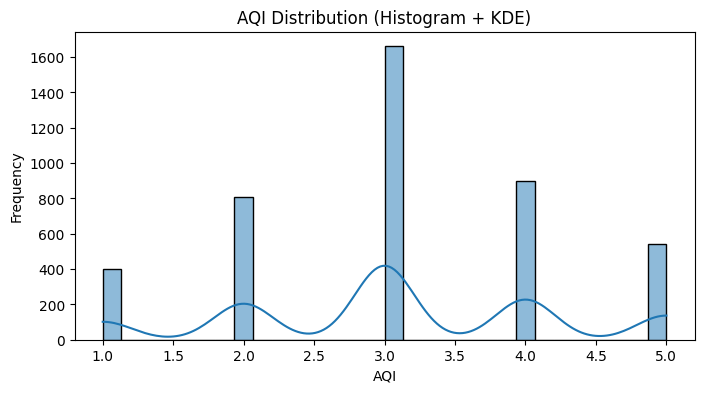

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(df["aqi"], bins=30, kde=True)

plt.title("AQI Distribution (Histogram + KDE)")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

 **Wind speed vs AQI Trend**

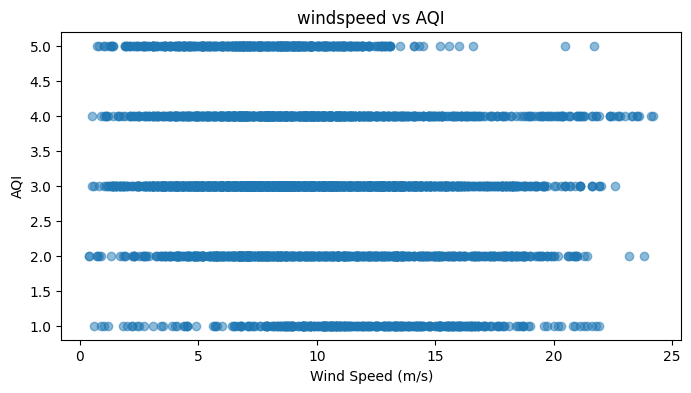

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(df["wind_speed_kph"],df['aqi'],alpha=0.5)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("AQI")
plt.title("windspeed vs AQI")
plt.show()


**Pollutant Time-Series Subplots (Trend View)**

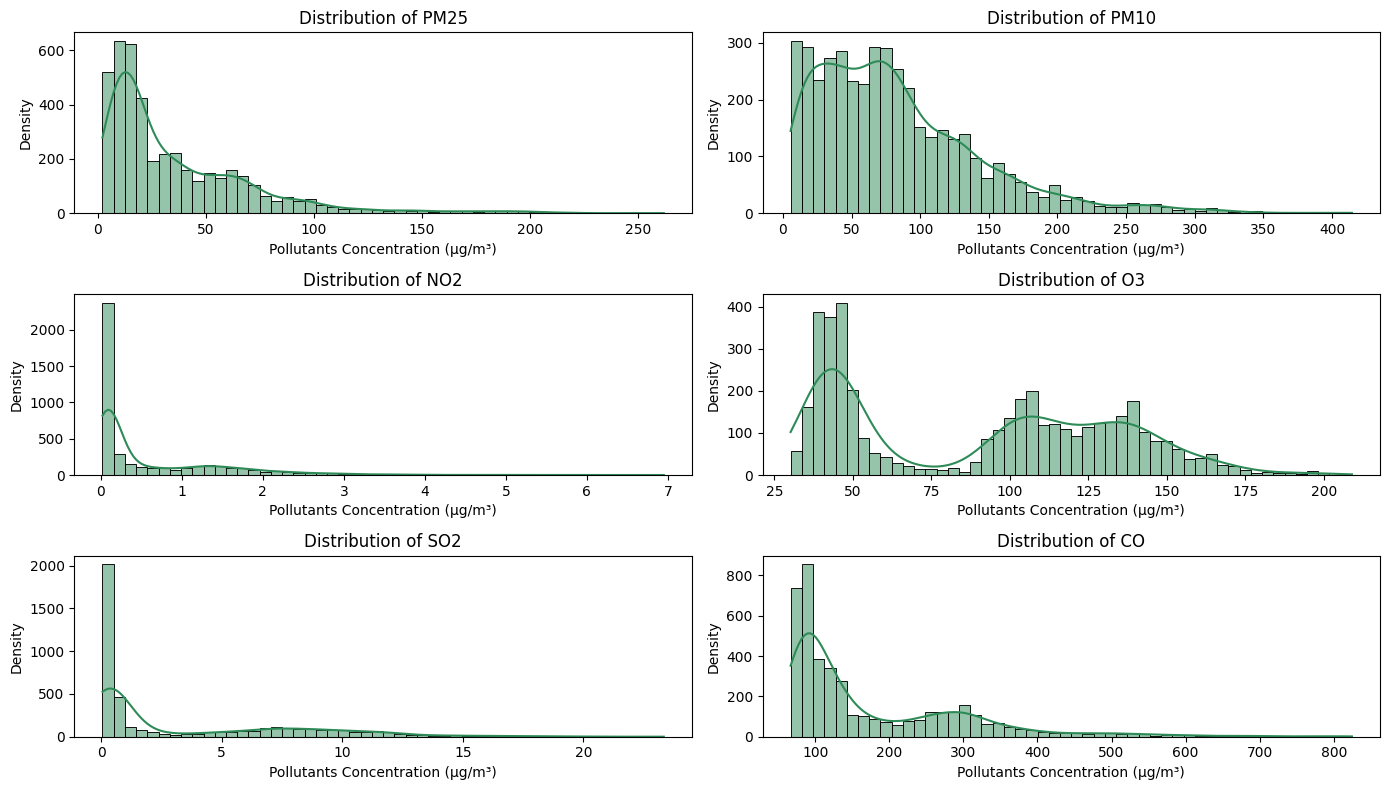

In [31]:
pollutants = ["pm25", "pm10", "no2", "o3", "so2", "co"]
plt.figure(figsize=(14,8))
for i,col in enumerate(pollutants,1):
  plt.subplot(3,2,i)
  sns.histplot(df[col],bins=50,kde=True,color="seagreen")
  plt.title(f"Distribution of {col.upper()}")
  plt.xlabel("Pollutants Concentration (µg/m³)")
  plt.ylabel("Density")
plt.tight_layout()
plt.show()




**Outlier Capping Using** **IQR**
|Caps outliers using IQR method and prints|- Lower and upper bounds
    - Number of outliers (below lower + above upper) for each pollutant- Percentage of outliers

In [20]:
def cap_outliers_iqr(df, columns):

    df_capped = df.copy()
    total_outliers = 0
    print("OUTLIER CAPPING SUMMARY (Pollutants)\n" + "-" * 60)

    for col in columns:
        if col not in df.columns:
            print(f"Warning: '{col}' not found in DataFrame.")
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count actual outliers
        outliers_below = df[col] < lower_bound
        outliers_above = df[col] > upper_bound
        num_outliers = outliers_below.sum() + outliers_above.sum()
        outlier_percentage = (num_outliers / len(df)) * 100

        total_outliers += num_outliers

        # Cap the values
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

        # Print info
        print(f"{col.upper():<6} | "
              f"Lower: {lower_bound:7.2f} , "
              f"Upper: {upper_bound:7.2f} | "
              f"Outliers: {num_outliers:4d} "
              f"({outlier_percentage:5.2f}%)")

    print("-" * 60)
    print(f"TOTAL OUTLIERS ACROSS ALL POLLUTANTS: {total_outliers} "
          f"({(total_outliers/len(df))*100:.2f}% of total rows)")

    return df_capped

# === APPLY TO YOUR DATASET ===
pollutants = ["pm25", "pm10", "no2", "o3", "so2", "co", "aqi"]

df_capped = cap_outliers_iqr(df, pollutants)

print(f"\nOriginal shape: {df.shape}")
print(f"Capped shape  : {df_capped.shape}")

OUTLIER CAPPING SUMMARY (Pollutants)
------------------------------------------------------------
PM25   | Lower:  -50.57 , Upper:  115.81 | Outliers:  182 ( 4.22%)
PM10   | Lower:  -71.60 , Upper:  215.86 | Outliers:  175 ( 4.06%)
NO2    | Lower:   -1.51 , Upper:    2.70 | Outliers:  143 ( 3.31%)
O3     | Lower:  -80.12 , Upper:  255.14 | Outliers:    0 ( 0.00%)
SO2    | Lower:   -9.93 , Upper:   17.29 | Outliers:   28 ( 0.65%)
CO     | Lower: -165.35 , Upper:  515.62 | Outliers:  109 ( 2.53%)
AQI    | Lower:   -1.00 , Upper:    7.00 | Outliers:    0 ( 0.00%)
------------------------------------------------------------
TOTAL OUTLIERS ACROSS ALL POLLUTANTS: 637 (14.76% of total rows)

Original shape: (4315, 12)
Capped shape  : (4315, 12)


**Plot Distribution After outlier Handling**

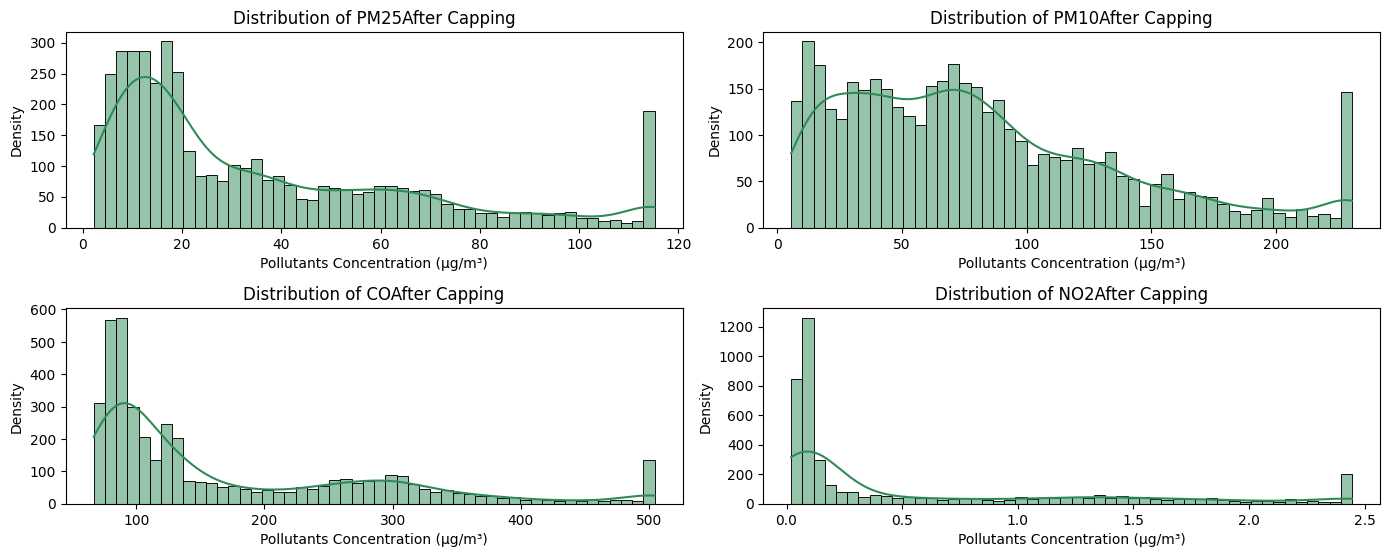

In [33]:
pollutants_capp= ["pm25", "pm10", "co","no2"]
plt.figure(figsize=(14,8))
for i,col in enumerate(pollutants_capp,1):
  plt.subplot(3,2,i)
  sns.histplot(df_capped[col],bins=50,kde=True,color="seagreen")
  plt.title(f"Distribution of {col.upper()}After Capping")
  plt.xlabel("Pollutants Concentration (µg/m³)")
  plt.ylabel("Density")
plt.tight_layout()
plt.show()

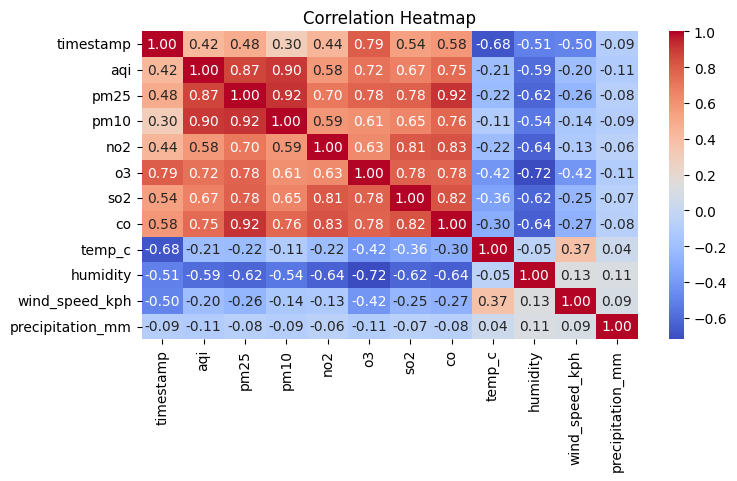

In [34]:
# df["timestamp"] = pd.to_datetime(df["timestamp"])
plt.figure(figsize=(8,4))
sns.heatmap(df_capped.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Save Cleaned Dataset**

In [11]:
df_capped.tail(10)

,timestamp,aqi,pm25,pm10,no2,o3,so2,co,temp_c,humidity,wind_speed_kph,precipitation_mm
4305,2026-01-26 09:00:00,4,59.97,132.87,1.48,152.66,8.64,356.93,21.3,25,9.3,0.0
4306,2026-01-26 10:00:00,4,59.89,128.37,1.30,157.06,8.48,349.75,21.6,25,7.6,0.0
4307,2026-01-26 11:00:00,4,58.91,123.35,1.28,158.80,8.30,340.88,21.5,25,6.8,0.0
4308,2026-01-26 12:00:00,4,58.28,120.47,1.45,159.50,8.37,336.14,21.1,26,6.9,0.0
4309,2026-01-26 13:00:00,4,57.12,117.17,1.75,158.87,8.48,332.77,20.4,28,7.1,0.0
4310,2026-01-26 14:00:00,4,54.92,111.94,1.78,156.57,8.49,327.52,19.0,31,9.6,0.0
4311,2026-01-26 15:00:00,4,52.93,107.64,1.77,153.64,8.78,325.05,18.0,35,10.3,0.0
4312,2026-01-26 16:00:00,4,51.31,104.57,1.96,150.78,9.40,328.50,16.8,39,12.1,0.0
4313,2026-01-26 17:00:00,4,49.73,102.39,2.30,146.62,10.30,337.51,15.6,41,12.6,0.0
4314,2026-01-26 18:00:00,4,47.65,99.84,2.55,141.68,10.97,346.66,14.9,41,12.6,0.0


In [21]:
output_path = "data/preprocessed_aqi_data.csv"
df.to_csv(output_path, index=False)
